# Analyzing the Stroop Effect Udacity Project

The purpose of this project is to investigate the Stroop Effect using the data provided by Udacity.

In a Stroop task, participants are presented with a list of words with each work displayed with a color. The participant has to say out loud the color of the ink in which the word has been written. The task has two conditions: Congruent and Incongruent.

Congruent words are displayed as the word of the color of which they are written in. For example, RED would be written using red ink.

Incongruent words are displayed in a different color of which they are written in. For example, RED would be written in any other colors apart from red.

### (1) What is the independent variable? What is the dependent variable?

Our Independent variable is the congruency or incongruency conditions.  Our dependent variable is the time taken to complete the congurent and incongruent tests.

### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

We want to prove there is no difference in time taken to complete congruent and incongruent tasks. So therefore, our **null hypothesis** stats that the difference between the population mean for incongruent tasks will be less than or equal to zero compared to the congruent population mean times.

* Let $\mu_{I}$ = population mean for incongruent times
* Let $\mu_{C}$ = population mean for congruent times



* $H_{0}$ : $\mu_{I}$ - $\mu_{C} \leq 0$

Therefore, our alternative hypothesis states that there will be a difference. Our alternative hypothesis states that the difference between the incongruent population mean times and congruent population mean times will be greater than zero.

* $H_{1}$ : $\mu_{I}$ - $\mu_{C}$ > 0

To test our hypothesis, we will use a paired sample t-test as our participants are the same for both the congruent and incongruent tests. We are using a t-test rather than the z-test because we do not know the standard deviation for our population.

We also make the assumption that each sample in our data is normal (Assumption of Normality). We make this assumption in order to use the same statistical procedure for our sample sizes.

### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
# Load the file and read it's head
stroop_df = pd.read_csv('stroopdata.csv')
stroop_df.index = np.arange(1, len(stroop_df) + 1)
stroop_df.head()

,Congruent,Incongruent
1,12.079,19.278
2,16.791,18.741
3,9.564,21.214
4,8.630,15.687
5,14.669,22.803


In [4]:
congruent = stroop_df['Congruent']
incongruent = stroop_df['Incongruent']

In [5]:
stroop_df['Difference'] = incongruent - congruent
difference = stroop_df['Difference']

In [6]:
# Get the summary statistics for our dataset
stroop_df.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

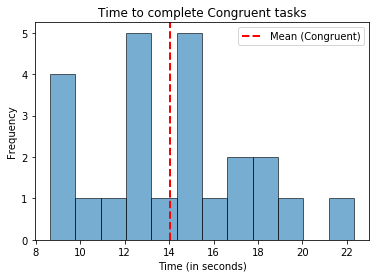

In [7]:
# Plot a distribution histogram for Congruent
plt.hist(congruent, alpha=0.6, histtype='bar', ec='black', bins=12)
plt.title('Time to complete Congruent tasks')
plt.ylabel('Frequency')
plt.xlabel('Time (in seconds)')
plt.axvline(congruent.mean(), label="Mean (Congruent)", color='r', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')

# show the plot
plt.show()

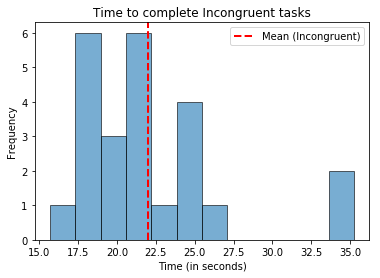

In [8]:
# Plot a distribution histogram for Incongruent
plt.hist(incongruent, alpha=0.6, histtype='bar', ec='black', bins=12)
plt.title('Time to complete Incongruent tasks')
plt.ylabel('Frequency')
plt.xlabel('Time (in seconds)')
plt.axvline(incongruent.mean(), label="Mean (Incongruent)", color='r', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')

# show the plot
plt.show()

It appears that people generally take longer to complete the incongruent tasks in the Stroop test.

There appear to be a couple of people who took longer than 30 seconds to complete the incongruent test.

On average, participants take 7.5 seconds longer on the incongruent test then on the congruent test. There are 2 participants who take a much longer time to complete the incongruent test than the congruent test, while 6 participants appear to perform quite well on both tests as there is not much difference in times.

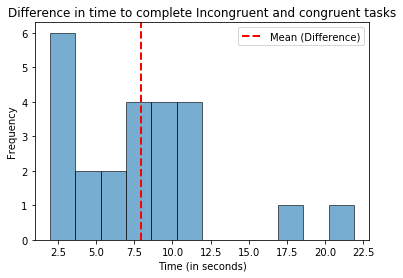

In [9]:
# Plot a distribution histogram for Difference
plt.hist(difference, alpha=0.6, histtype='bar', ec='black', bins=12)
plt.title('Difference in time to complete Incongruent and congruent tasks')
plt.ylabel('Frequency')
plt.xlabel('Time (in seconds)')
plt.axvline(difference.mean(), label="Mean (Difference)", color='r', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')

# show the plot
plt.show()

### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [10]:
# Perform a t-test
t_stat, p_value = stats.ttest_rel(a=incongruent, b=congruent)
print('The t-statistic value is: ', str(t_stat))
print('The p-value is: ', str(p_value))

The t-statistic value is:  8.02070694411
The p-value is:  4.10300058571e-08


In [11]:
# Confidence Interval
HO_rejection = 1-p_value
print(HO_rejection)

0.99999995897


With a p-value of 4.10e-8, we can reject the null hypothesis with at least 99% confidence. Therefore we have disproved our null hypothesis and we can state that there is a difference between participants performance for congruent and incogruent tests.